In [5]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [6]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv("Resources/lending_data.csv")

# Review the DataFrame
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [7]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df.loan_status

# Separate the X variable, the features
X = df.drop(columns="loan_status")

In [8]:
# Review the y variable Series
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [9]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [10]:
# Check the balance of our target values
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [11]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

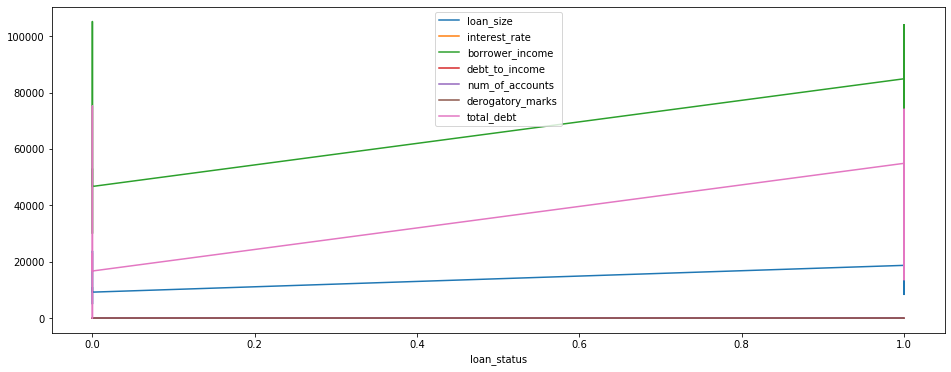

In [12]:
df.set_index('loan_status').plot(figsize=(16,6))

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [13]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(random_state = 1)

# Fit the model using training data
model.fit(X_train,y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [14]:
# Make a prediction using the testing data
y_pred = model.predict(X_test)

In [15]:
pd.DataFrame(y_pred)[0].value_counts()

0    18752
1      632
Name: 0, dtype: int64

In [16]:
y_test.value_counts()

0    18792
1      592
Name: loan_status, dtype: int64

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [17]:
# Print the balanced_accuracy score of the model
balanced_accuracy_score(y_test, y_pred)

0.95276202927065

In [18]:
y_test.value_counts()

0    18792
1      592
Name: loan_status, dtype: int64

In [19]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, y_pred)

array([[18699,    93],
       [   53,   539]])

In [21]:
# Print the classification report for the model
test_report = classification_report(y_test, y_pred)
print(test_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18792
           1       0.85      0.91      0.88       592

    accuracy                           0.99     19384
   macro avg       0.93      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** For the healthy loan, 0, the model has a precision of 1.00, meaning that it's correct 100% of the time. The model has a recall of 1.00, which means that it correctly identifies 100% of the actual healthy loans. The f1-score is 1.00, which reflects a perfect balance between precisionand recall for healthy loans.                                                                                      For high-risk loan, 1, the model has a precision of 0.85, meaning that it's correct about 85% of the time. The model has a recall of 0.91, which means that it identifies approx 91% of the actual high-risk loans. The f1-score is 0.88, which indicates a good balance between precision and recall for high-risk loans. 

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [25]:
# Installing imbalanced-learn
pip install imbalanced-learn

     |████████████████████████████████| 226 kB 2.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [33]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [35]:
# Count the distinct values of the resampled labels data
y_resampled.value_counts()

1    56244
0    56244
Name: loan_status, dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [43]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
resampled_model = LogisticRegression(random_state = 1)

# Fit the model using the resampled training data
resampled_model.fit(X_resampled, y_resampled)

# Make a prediction using the testing data
resampled_pred = resampled_model.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [44]:
# Print the balanced_accuracy score of the model 
balanced_accuracy_score(y_test, resampled_pred)

0.9954904617260939

In [45]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, resampled_pred)

array([[18686,   106],
       [    2,   590]])

In [46]:
# Print the classification report for the model
report = classification_report(y_test, resampled_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18792
           1       0.85      1.00      0.92       592

    accuracy                           0.99     19384
   macro avg       0.92      1.00      0.96     19384
weighted avg       1.00      0.99      0.99     19384



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** For the healthy loan, 0, the model has a precision of 1.00, meaning that it's correct 100% of the time. The model has a recall of 0.99, which means that it correctly identifies 99% of the actual healthy loans. The f1-score is 1.00, which reflects a perfect balance between precision and recall for healthy loans. For high-risk loan, 1, the model has a precision of 0.85, meaning that it's correct about 85% of the time. The model has a recall of 1.00, which means that it identifies approx 100% of the actual high-risk loans. The f1-score is 0.92, which indicates a great balance between precision and recall for high-risk loans.